In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [93]:
import statsmodels.api as sm

In [11]:
gdp = pd.read_csv('C:\\Users\\malna\\Life-Expectancy-and-GDP-Starter\\all_data.csv')

In [13]:
print(gdp.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [15]:
print(gdp.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [17]:
print(gdp.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [24]:
gdp_chile = gdp[gdp.Country=='Chile']

In [25]:
gdp_china = gdp[gdp.Country=='China']

In [29]:
gdp_germany = gdp[gdp.Country=='Germany']

In [30]:
gdp_mexico = gdp[gdp.Country=='Mexico']

In [31]:
gdp_USA = gdp[gdp.Country=='United States of America']

In [32]:
gdp_zimbabwe = gdp[gdp.Country=='Zimbabwe']

In [66]:
gdp_countries = gdp.Country.unique()

In [86]:
for country in gdp_countries:
    mean_life_expectancy = np.mean(gdp['Life expectancy at birth (years)'][gdp.Country==country])
    std_life_expectancy = np.std(gdp['Life expectancy at birth (years)'][gdp.Country==country])
    print('The Mean of Life expectancy at birth (years) in ' + country + ' : ' + str(mean_life_expectancy))
    print('The STD of Life expectancy at birth (years) in ' + country + ' : ' + str(std_life_expectancy))
    print('-------------')

The Mean of Life expectancy at birth (years) in Chile : 78.94375
The STD of Life expectancy at birth (years) in Chile : 1.0252857833306763
-------------
The Mean of Life expectancy at birth (years) in China : 74.26249999999999
The STD of Life expectancy at birth (years) in China : 1.2761636846423725
-------------
The Mean of Life expectancy at birth (years) in Germany : 79.65625
The STD of Life expectancy at birth (years) in Germany : 0.9440396906380575
-------------
The Mean of Life expectancy at birth (years) in Mexico : 75.71875
The STD of Life expectancy at birth (years) in Mexico : 0.6012681909930035
-------------
The Mean of Life expectancy at birth (years) in United States of America : 78.0625
The STD of Life expectancy at birth (years) in United States of America : 0.8061288668693107
-------------
The Mean of Life expectancy at birth (years) in Zimbabwe : 50.09375
The STD of Life expectancy at birth (years) in Zimbabwe : 5.751681140110255
-------------


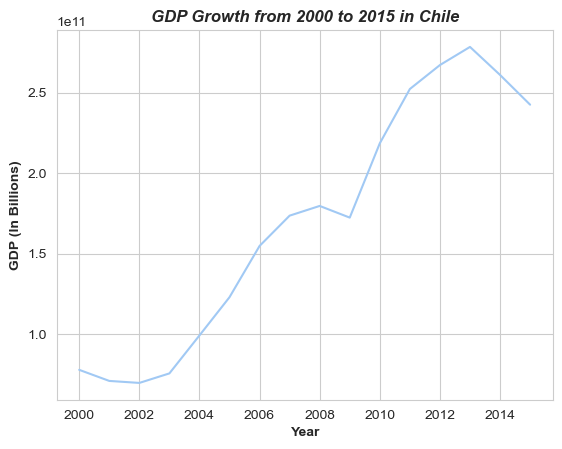

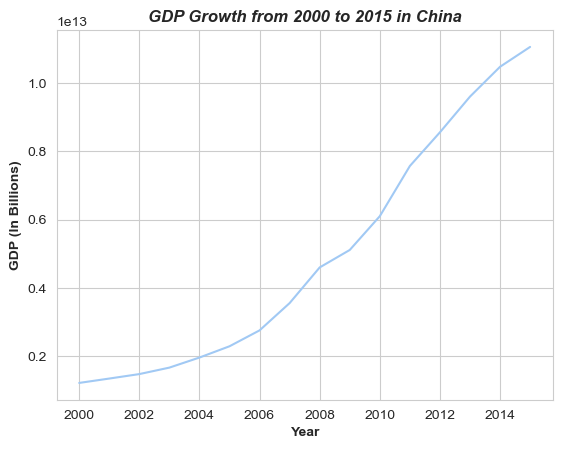

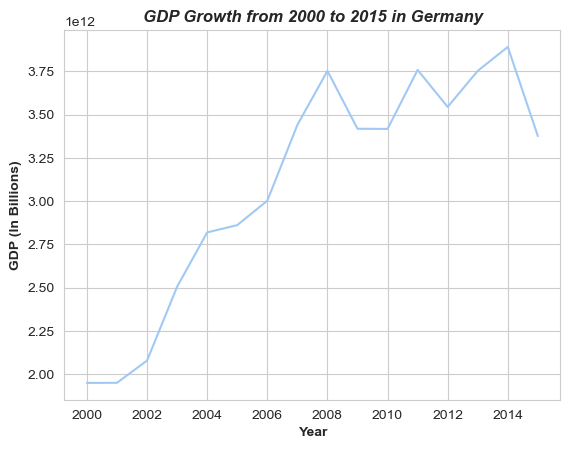

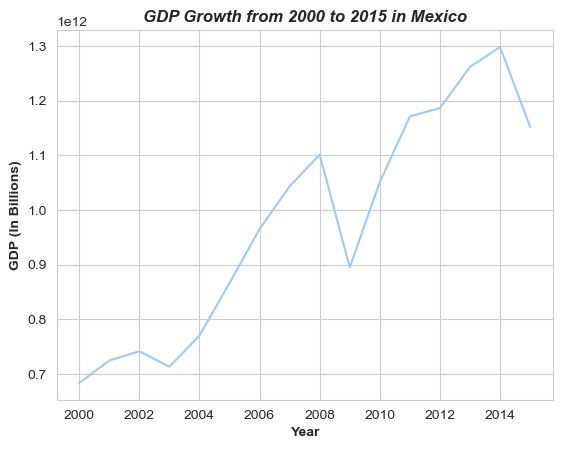

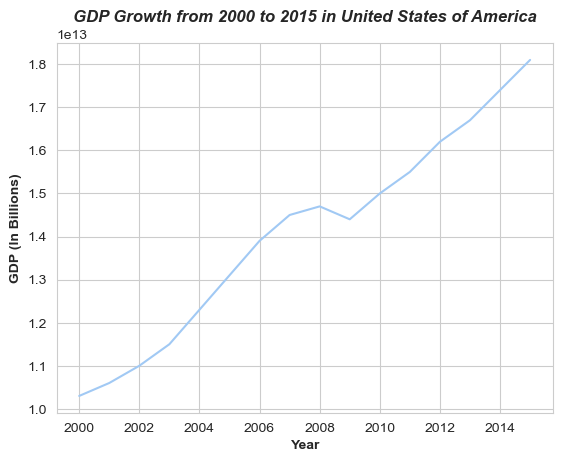

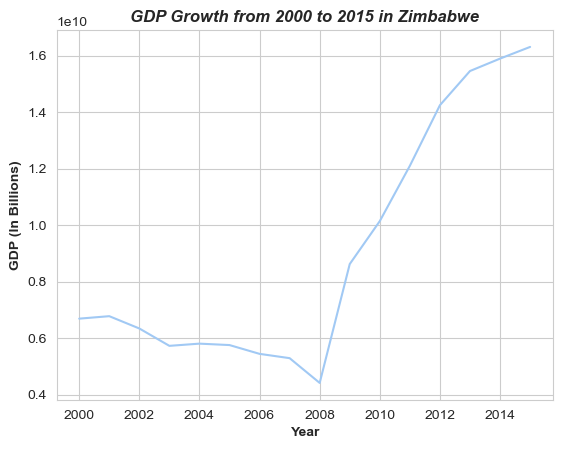

<Figure size 640x480 with 0 Axes>

In [67]:
for country in gdp_countries:
    sns.lineplot(x= gdp.Year[gdp.Country==country], y= gdp.GDP[gdp.Country==country])
    sns.set_palette('pastel')
    plt.title('GDP Growth from 2000 to 2015 in ' + country, fontweight= 'bold', fontstyle= 'italic')
    plt.xlabel('Year', fontweight= 'bold')
    plt.ylabel('GDP (In Billions)', fontweight= 'bold')
    plt.show()
    plt.clf()

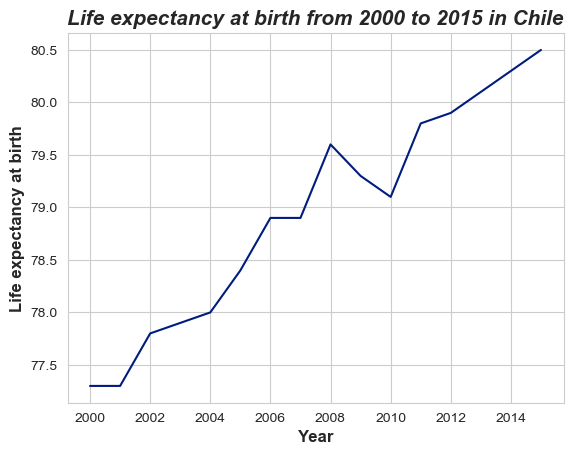

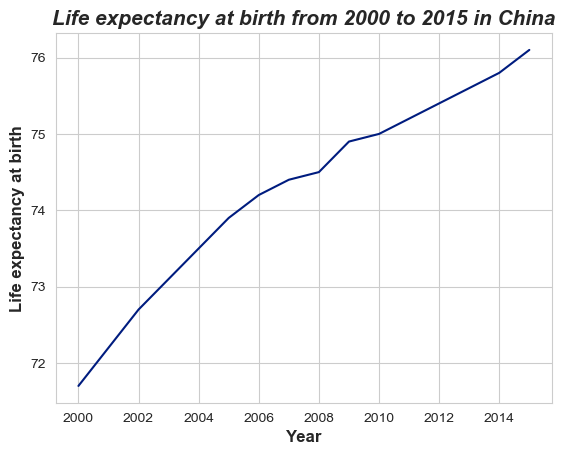

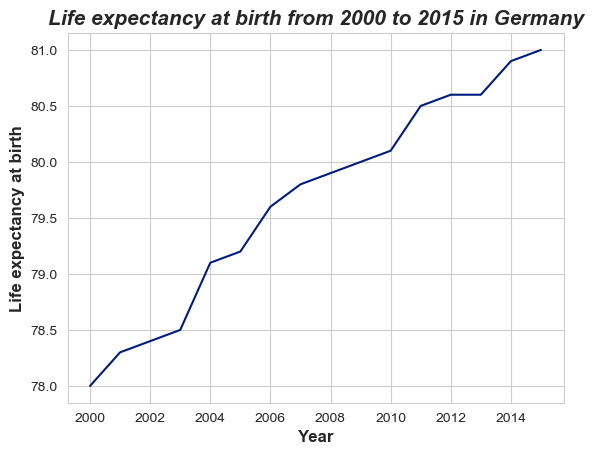

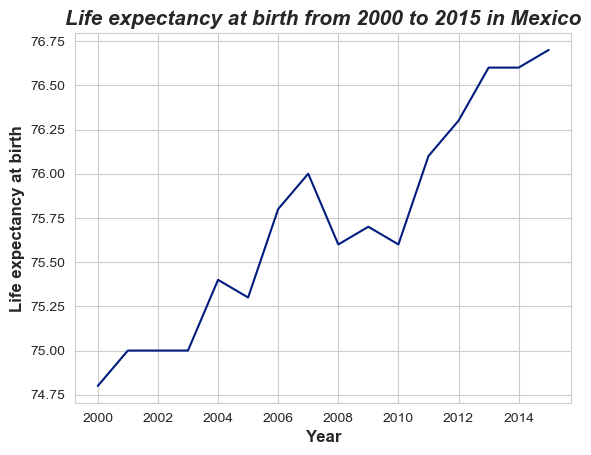

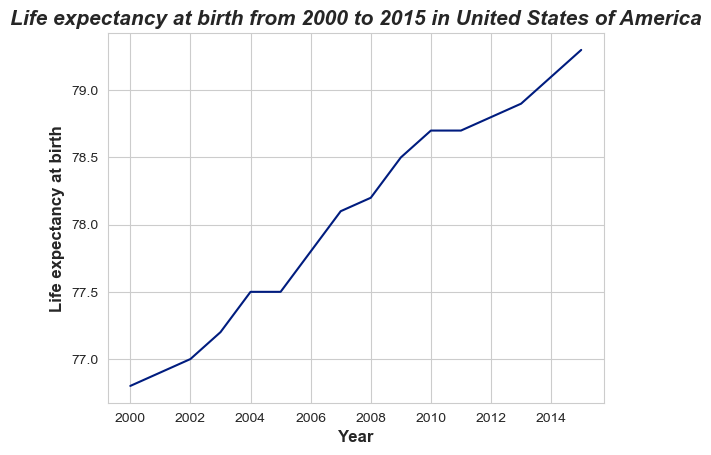

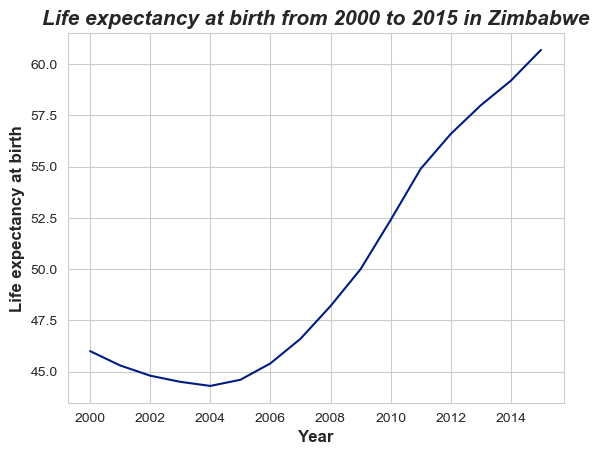

<Figure size 640x480 with 0 Axes>

In [78]:
for country in gdp_countries:
    sns.lineplot(x= gdp.Year[gdp.Country==country], y= gdp['Life expectancy at birth (years)'][gdp.Country==country])
    plt.title('Life expectancy at birth from 2000 to 2015 in ' + country, fontsize= 15, fontweight= 'bold', fontstyle= 'italic')
    plt.xlabel('Year', fontsize= 12, fontweight= 'bold')
    plt.ylabel('Life expectancy at birth', fontsize= 12, fontweight= 'bold')
    sns.set_palette('dark')
    plt.show()
    plt.clf()

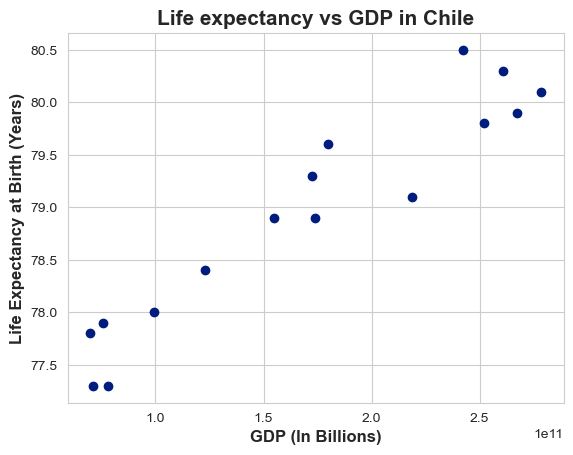

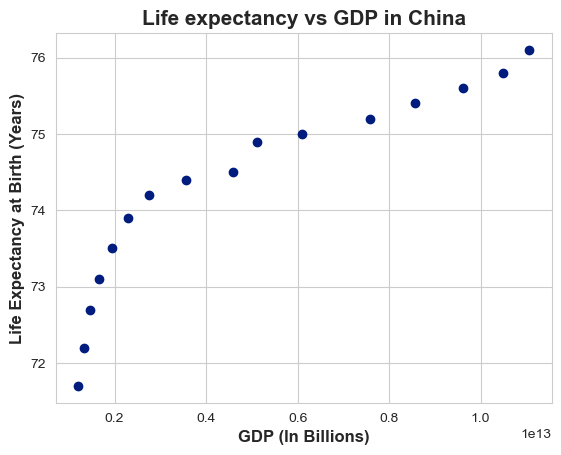

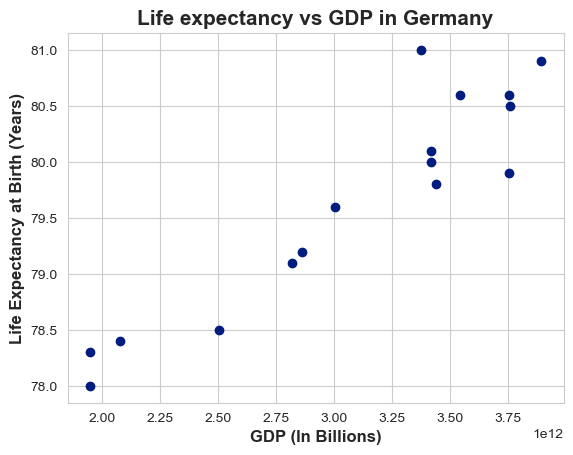

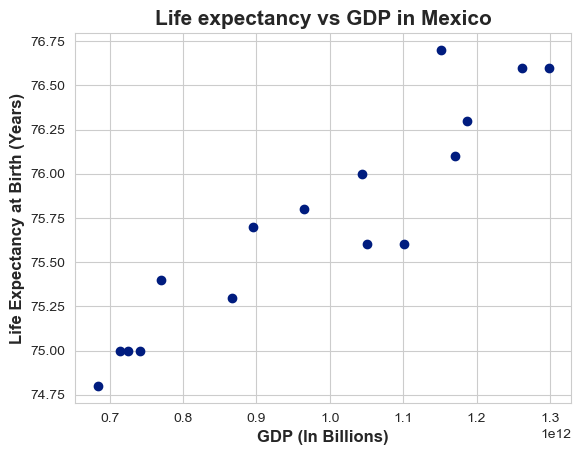

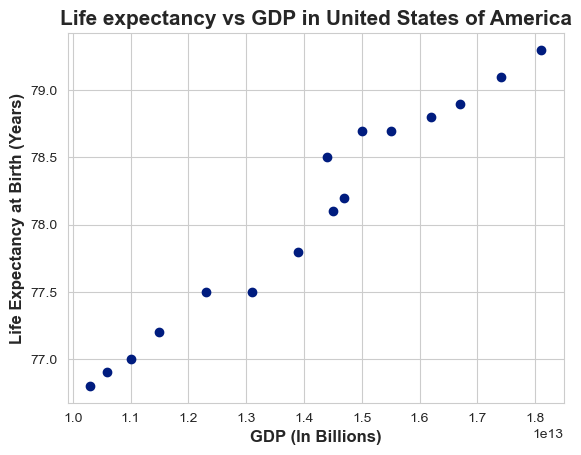

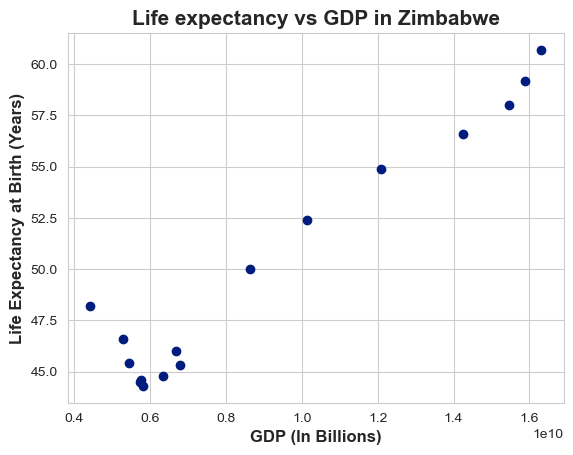

<Figure size 640x480 with 0 Axes>

In [90]:
for country in gdp_countries:
    plt.scatter(x= gdp.GDP[gdp.Country==country], y= gdp['Life expectancy at birth (years)'][gdp.Country==country])
    plt.title('Life expectancy vs GDP in ' + country, fontsize= 15, fontweight= 'bold')
    plt.xlabel('GDP (In Billions)', fontsize= 12, fontweight= 'bold')
    plt.ylabel('Life Expectancy at Birth (Years)', fontsize= 12, fontweight= 'bold')
    plt.show()
    plt.clf()

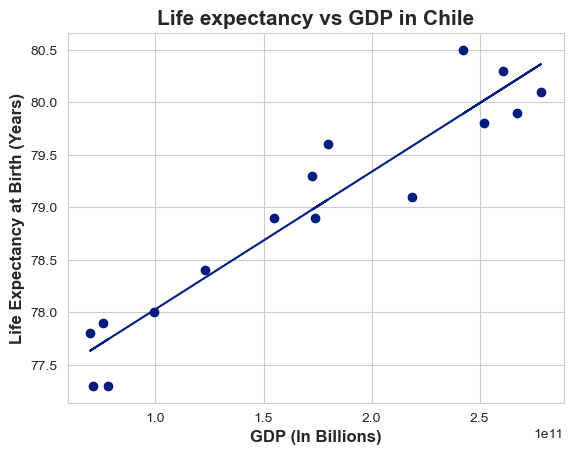

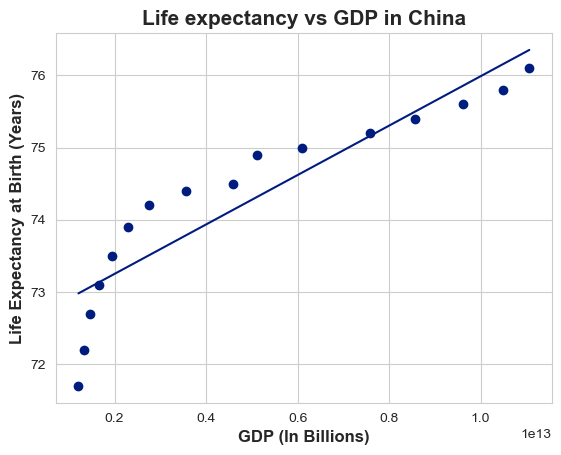

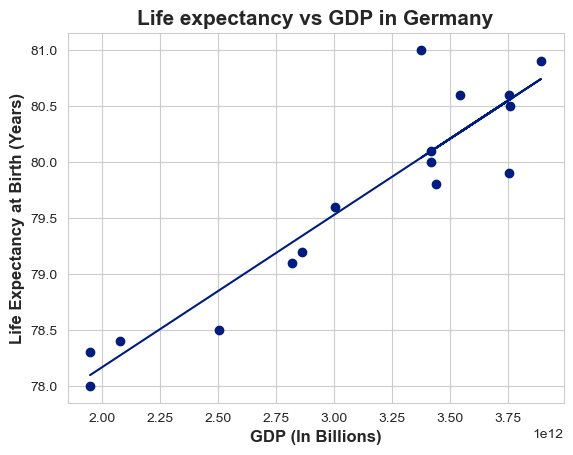

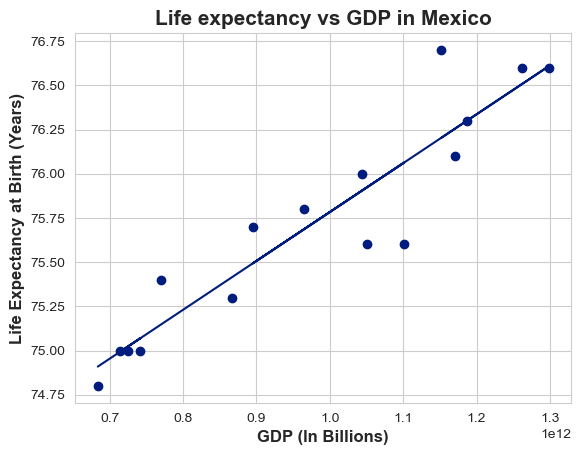

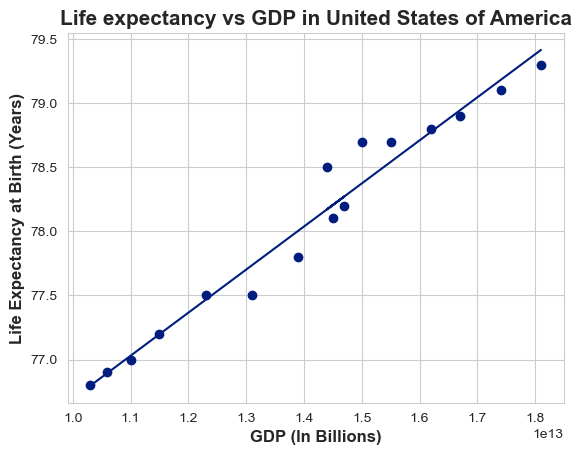

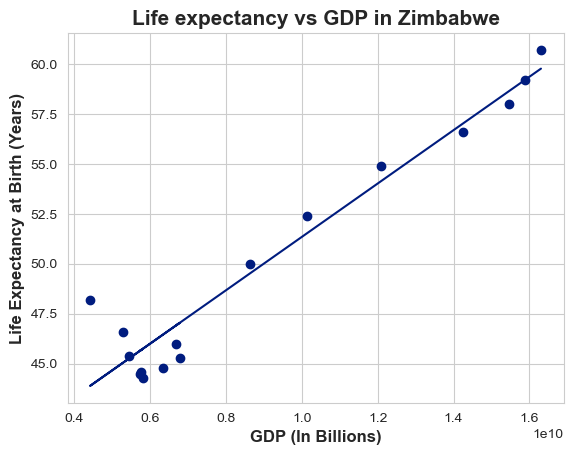

<Figure size 640x480 with 0 Axes>

In [109]:
for country in gdp_countries:
    country_data = gdp[gdp.Country==country]
    model = sm.OLS.from_formula('Q("Life expectancy at birth (years)") ~ GDP', data= country_data)
    results = model.fit()
    plt.scatter(x= country_data.GDP, y= country_data['Life expectancy at birth (years)'])
    plt.plot(country_data.GDP, results.predict(country_data))
    plt.title('Life expectancy vs GDP in ' + country, fontsize= 15, fontweight= 'bold')
    plt.xlabel('GDP (In Billions)', fontsize= 12, fontweight= 'bold')
    plt.ylabel('Life Expectancy at Birth (Years)', fontsize= 12, fontweight= 'bold')
    plt.show()
    plt.clf()

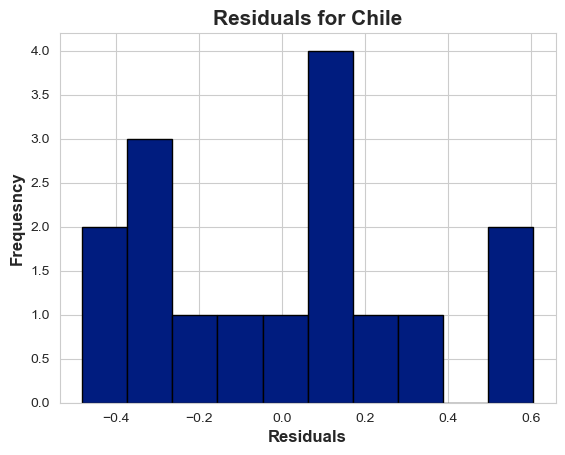

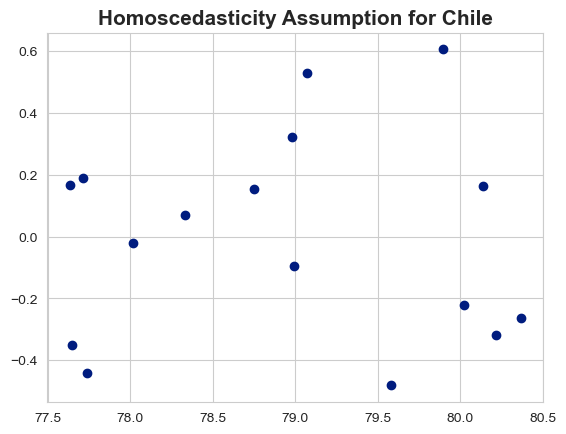

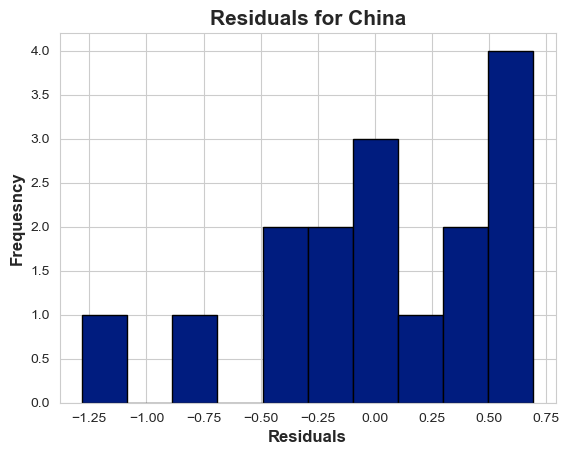

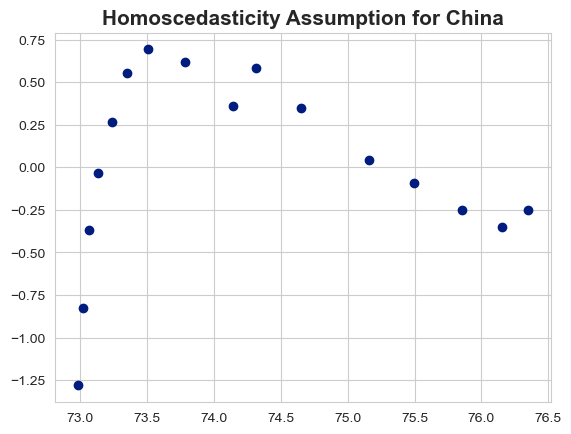

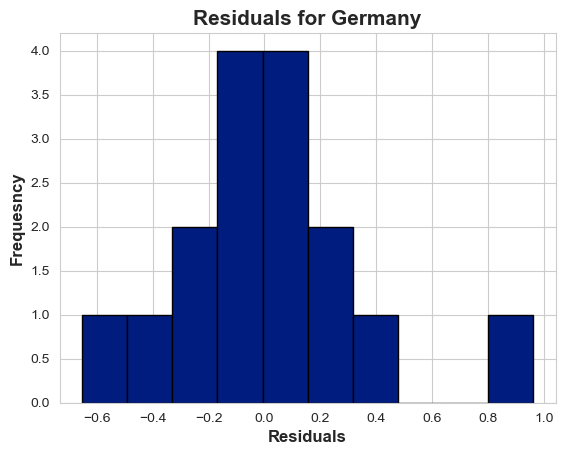

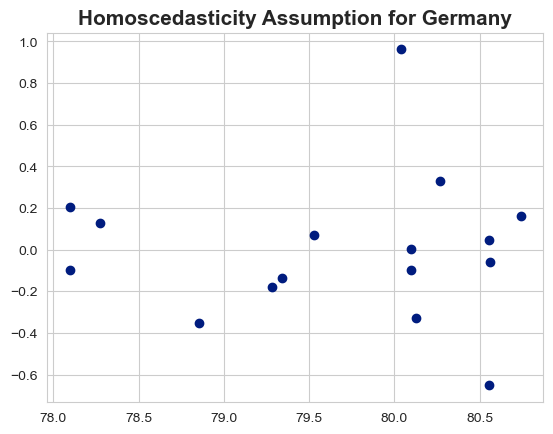

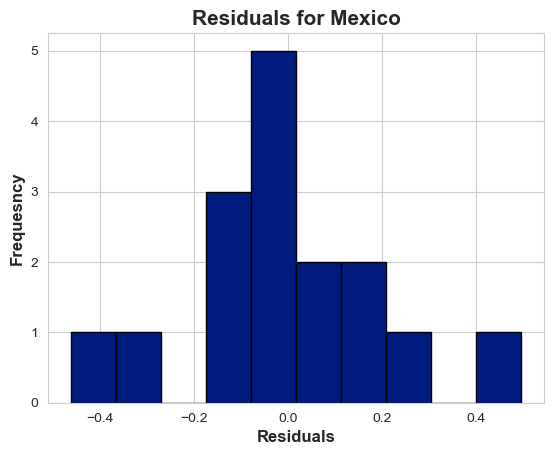

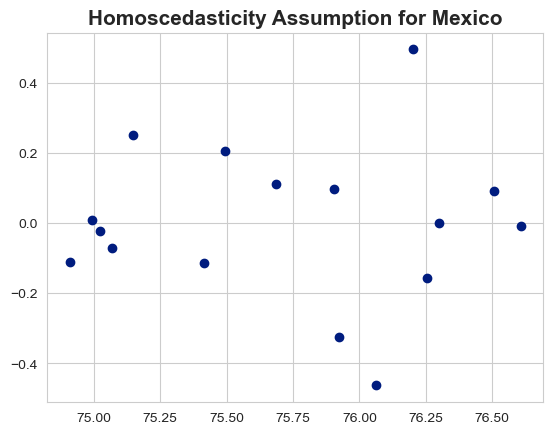

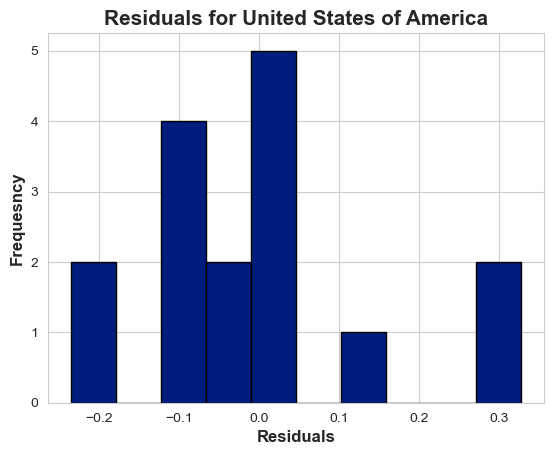

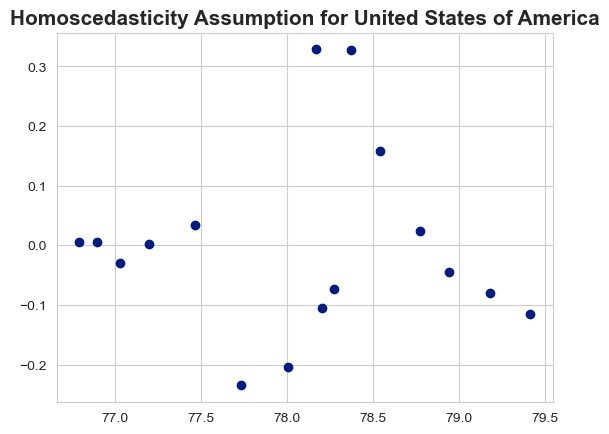

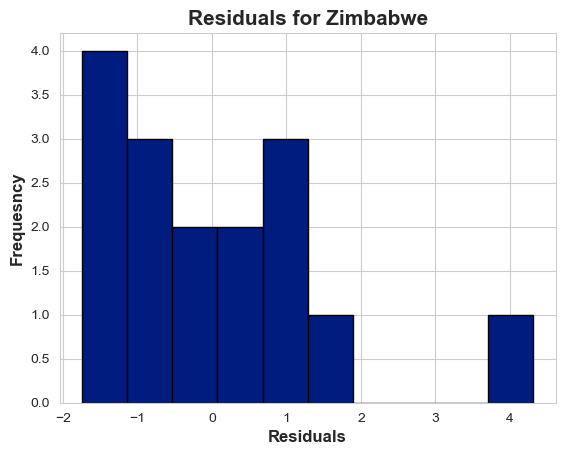

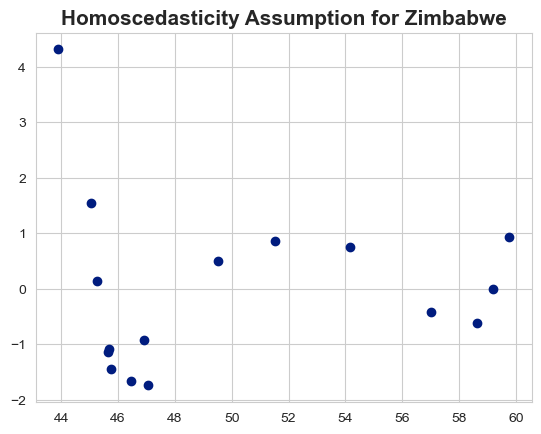

<Figure size 640x480 with 0 Axes>

In [133]:
for country in gdp_countries:
    country_data = gdp[gdp.Country==country]
    model = sm.OLS.from_formula('Q("Life expectancy at birth (years)") ~ GDP', data= country_data)
    results = model.fit()
    fitted_values = results.predict(country_data)
    residuals = country_data['Life expectancy at birth (years)'] - fitted_values
    plt.hist(residuals, bins= 10, edgecolor= 'black')
    plt.title('Residuals for ' + country, fontsize= 15, fontweight= 'bold')
    plt.xlabel('Residuals', fontsize= 12, fontweight= 'bold')
    plt.ylabel('Frequesncy', fontsize= 12, fontweight= 'bold')
    plt.show()
    plt.clf()
    plt.scatter(fitted_values, residuals)
    plt.title('Homoscedasticity Assumption for ' + country, fontsize= 15, fontweight= 'bold')
    plt.show()
    plt.clf()
    
    

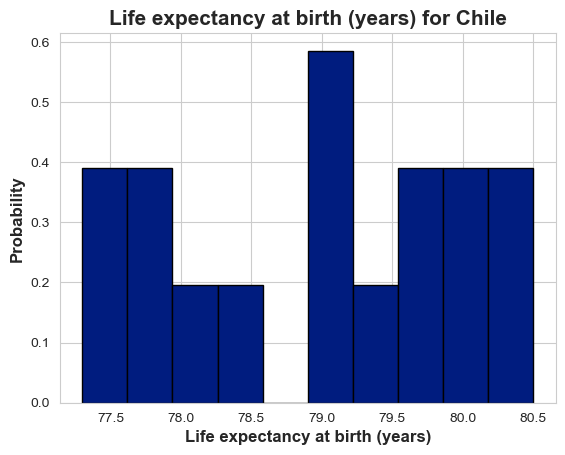

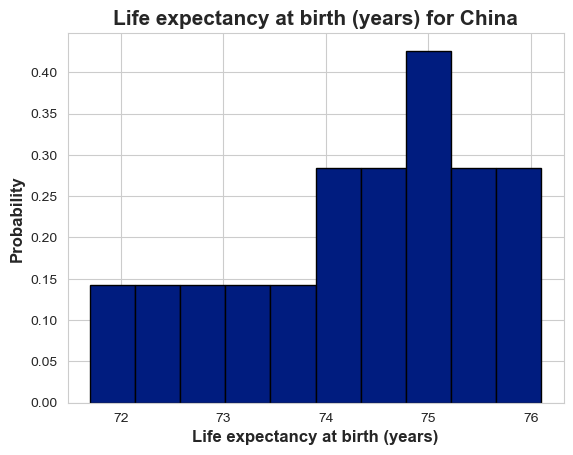

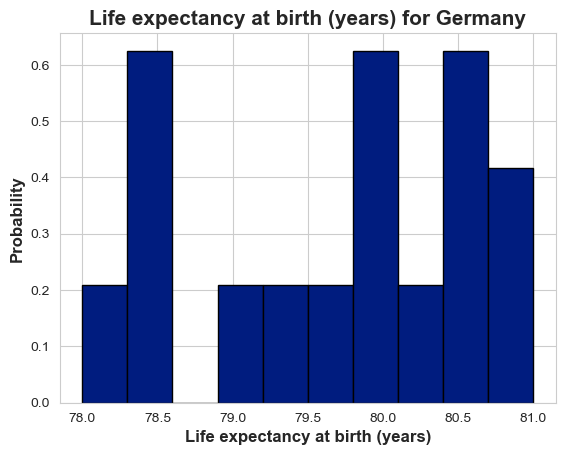

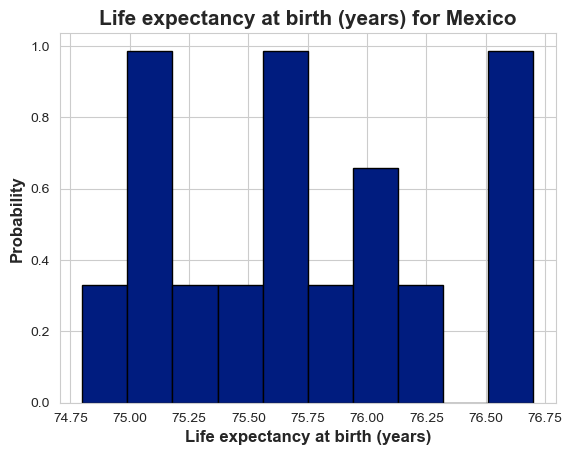

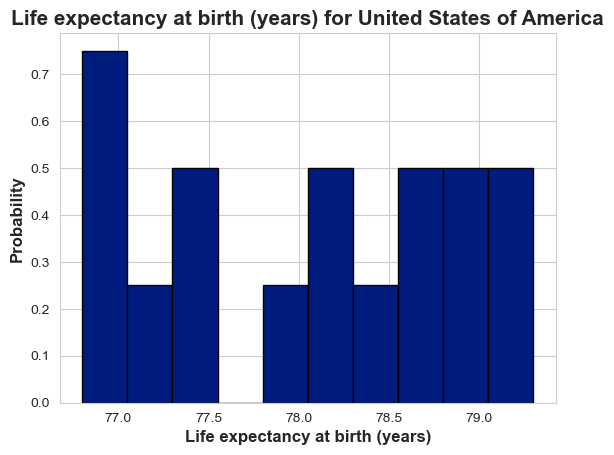

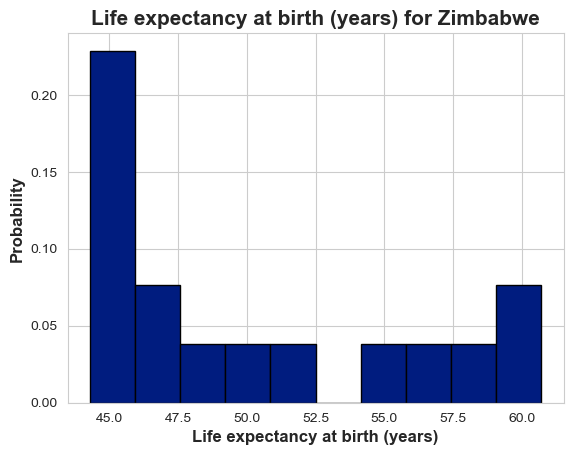

<Figure size 640x480 with 0 Axes>

In [136]:
for country in gdp_countries:
    country_data = gdp[gdp.Country==country]
    plt.hist(country_data['Life expectancy at birth (years)'], density= True, edgecolor= 'black', bins= 10)
    plt.title('Life expectancy at birth (years) for ' + country, fontsize= 15, fontweight= 'bold')
    plt.xlabel('Life expectancy at birth (years)', fontsize= 12, fontweight= 'bold')
    plt.ylabel('Probability', fontsize= 12, fontweight= 'bold')
    plt.show()
    plt.clf()